# LOAD NEW YORK TIMES DATA
Github Repository: https://github.com/nytimes/covid-19-data.git

In [1]:
#READ DATA
import pandas as pd
import numpy as np
from datetime import datetime

nytdata = pd.read_csv("C:/Users/Chad/Documents/Jupyter/COVID/NYTimesData/us-states.csv")

#GET VALUES FROM MARCH 1st AND SORT BY DATE
nytfiltered = nytdata[(nytdata['date']>'2020-04-01')]
nytfiltered.sort_values(by=['date'])
states = nytdata.state.unique()

print('Status: Executed at ' + datetime.today().strftime('%Y-%m-%d-%H:%M:%S'))

Status: Executed at 2020-05-04-19:13:14


## Latest Cases By State

In [2]:
#COMPUTE DOT
def DOT(df):  
    M = df.diff(1)  
    DOT = pd.Series(M, name = 'new_cases') 
    return DOT

#RUNNING MEAN
def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

df_dot = pd.DataFrame(columns =['ranking','state','new_cases','new_deaths'])

for state in states:
    df1 = nytfiltered[(nytfiltered['state']==state)]
    dot = DOT(df1['cases'])
    
    df2 = df1.copy()
    df2.insert(len(df1.columns), 'new_cases', dot, True)
    df3 = df2.tail(1)
    
    dot = DOT(df1['deaths'])
    
    df2 = df1.copy()
    df2.insert(len(df1.columns), 'new_deaths', dot, True)
    df4 = df2.tail(1)
    
    line = pd.DataFrame({'ranking': 0 ,'state': df3['state'], 'new_cases': df3['new_cases'], 'new_deaths': df4['new_deaths']})
    frames = [line, df_dot]
    df_dot = pd.concat(frames)

nytlatest = df_dot.sort_values(by=['new_cases'], ascending=False)
nytlatest['ranking'] = np.arange(len(nytlatest)) + 1

print('Status: Executed')
preview = nytlatest[['ranking','state','new_cases']]
preview.head(10)

Status: Executed


,ranking,state,new_cases
3402,1,New York,3438.0
3400,2,New Jersey,3027.0
3383,3,Illinois,2994.0
3391,4,Massachusetts,1824.0
3373,5,California,1319.0
3409,6,Pennsylvania,1008.0
3390,7,Maryland,989.0
3419,8,Virginia,940.0
3415,9,Texas,866.0
3384,10,Indiana,638.0


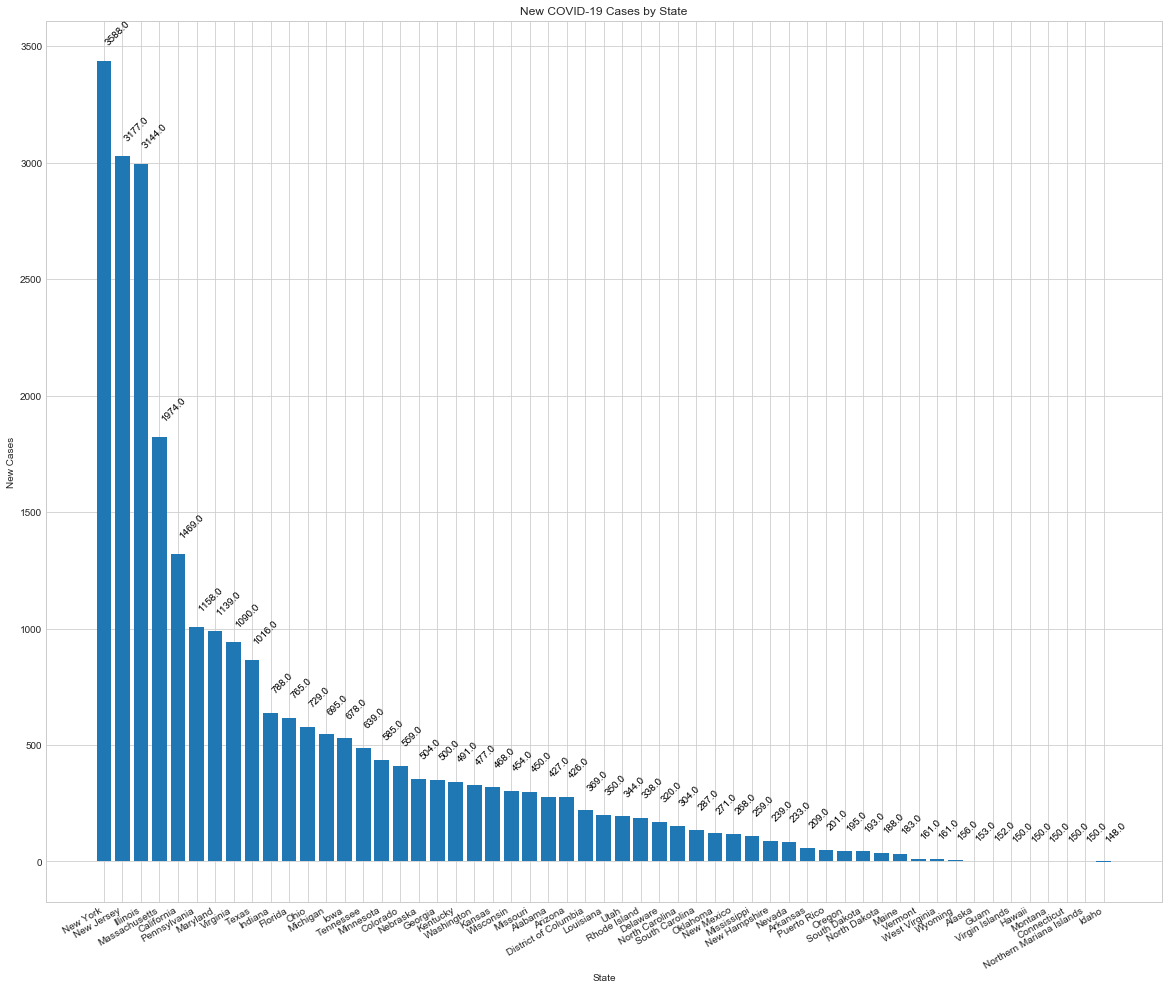

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('State')
ax.set_ylabel('New Cases')
ax.set_title('New COVID-19 Cases by State')

plt.bar(nytlatest['state'], nytlatest['new_cases'], width=0.8)

for x in range(0, len(nytlatest['state'])):
    state = nytlatest.iloc[x]['state']   
    new_cases = nytlatest.iloc[x]['new_cases'] + 150
    plt.text(state,new_cases,new_cases,color='black',rotation=45)

fig.autofmt_xdate()

## Latest Deaths By State

In [5]:
import numpy as np

nytlatest = df_dot.sort_values(by=['new_deaths'], ascending=False)
nytlatest['ranking'] = np.arange(len(nytlatest)) + 1

print('Status: Executed')
preview = nytlatest[['ranking','state','new_deaths']]
preview.head(10)

Status: Executed


,ranking,state,new_deaths
3402,1,New York,280.0
3391,2,Massachusetts,158.0
3400,3,New Jersey,129.0
3383,4,Illinois,56.0
3409,5,Pennsylvania,49.0
3419,6,Virginia,44.0
3392,7,Michigan,29.0
3390,8,Maryland,26.0
3393,9,Minnesota,24.0
3411,10,Rhode Island,24.0


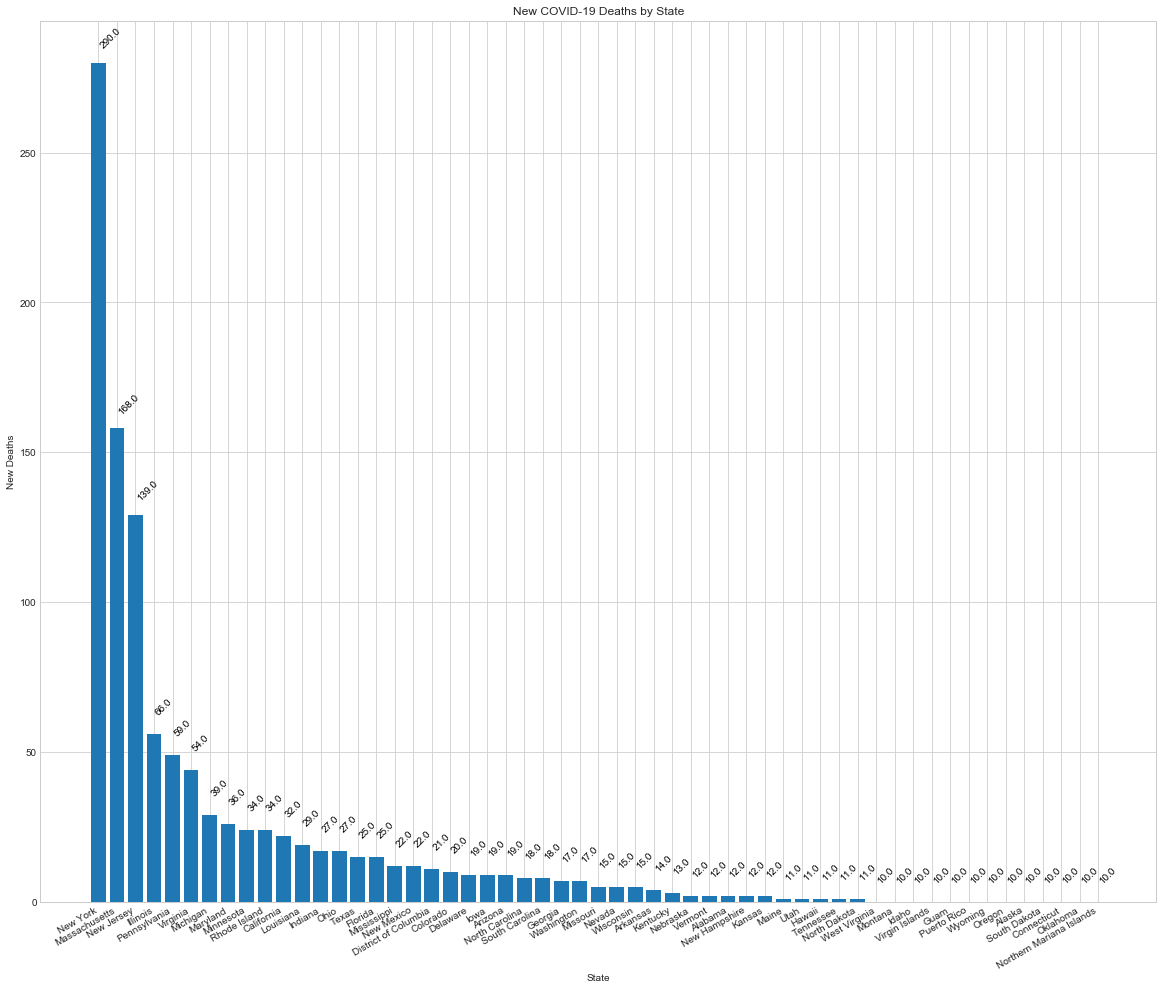

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('State')
ax.set_ylabel('New Deaths')
ax.set_title('New COVID-19 Deaths by State')

plt.bar(nytlatest['state'], nytlatest['new_deaths'], width=0.8)

for x in range(0, len(nytlatest['state'])):
    state = nytlatest.iloc[x]['state']   
    new_cases = nytlatest.iloc[x]['new_deaths'] + 10
    plt.text(state,new_cases,new_cases,color='black',rotation=45)

fig.autofmt_xdate()

## Cumulative Reported Cases By State
### (Excluding New York and New Jersey)

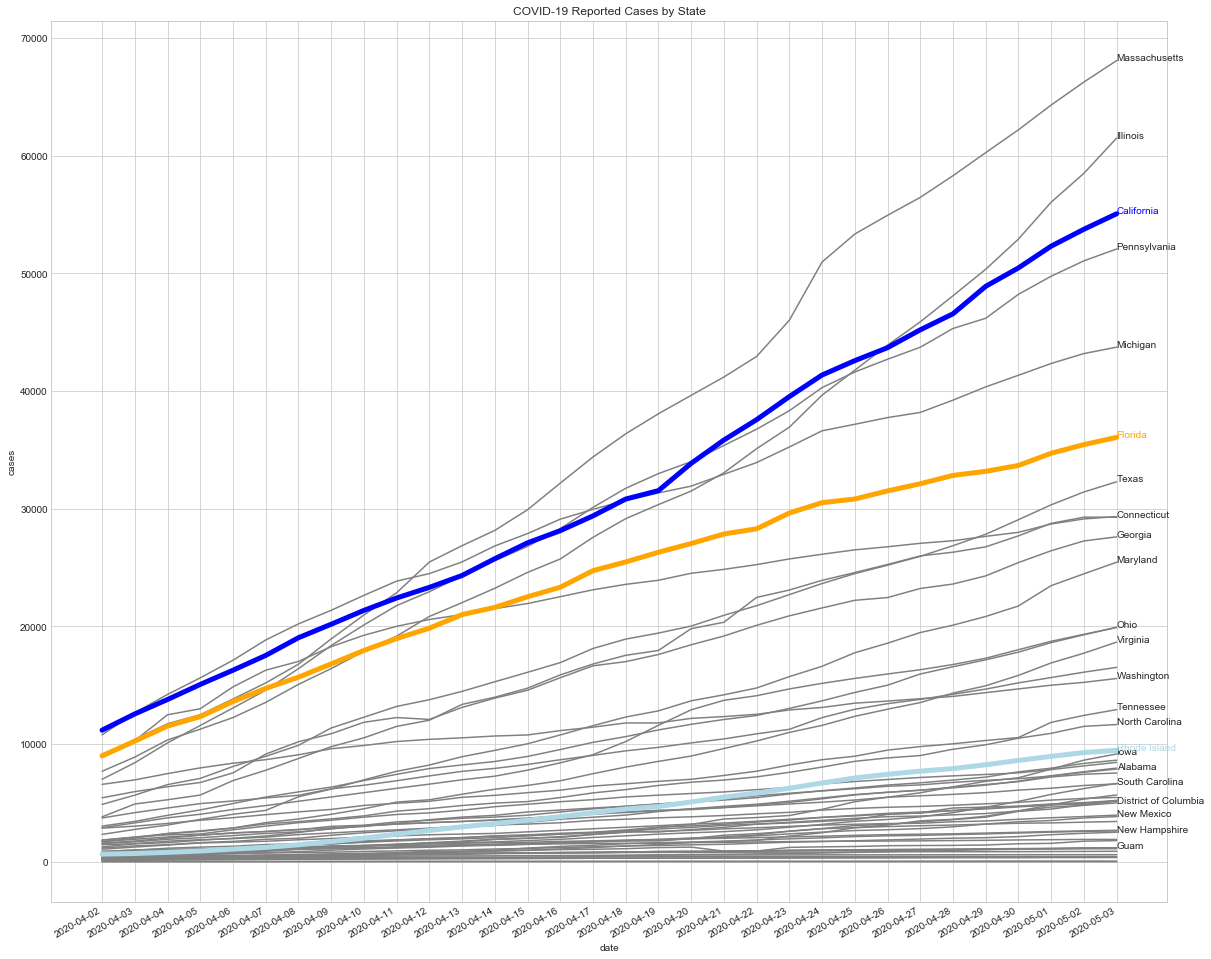

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('date')
ax.set_ylabel('cases')
ax.set_title('COVID-19 Reported Cases by State')

states = nytfiltered.state.unique()
lables = []

for state in states:
    if state!="New York" and state!="New Jersey":
        if state!="California" and state!="Florida" and state != 'Rhode Island':
            sdf = nytfiltered[(nytfiltered['state']==state)]
            plt.plot(sdf['date'], sdf['cases'], color='grey', label=state)
            
            ldf = sdf.tail(1)
            date = ldf.iloc[0]['date']   
            cases = ldf.iloc[0]['cases']
            lable_item = [state, date, cases]
            lables.append(lable_item)

#sort by cases
from operator import itemgetter
sortedlables = sorted(lables, key=itemgetter(2))
  
previous_cases = 0
for l in sortedlables:
    state = l[0]
    date = l[1]
    cases = l[2]
    #print(cases)
    
    if previous_cases == 0:
        previous_cases = cases
    
    if cases > previous_cases + 1000:
        plt.text(date,cases,state,horizontalalignment='left')
        previous_cases = cases

state='California'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['cases'], color='blue', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['cases'],state,horizontalalignment='left',color='blue')

state='Florida'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['cases'], color='orange', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['cases'],state,horizontalalignment='left',color='orange')

state='Rhode Island'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['cases'], color='lightblue', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['cases'],state,horizontalalignment='left',color='lightblue')

fig.autofmt_xdate()

## Reported Cumulative Deaths By State
### (Excluding New York and New Jersey)

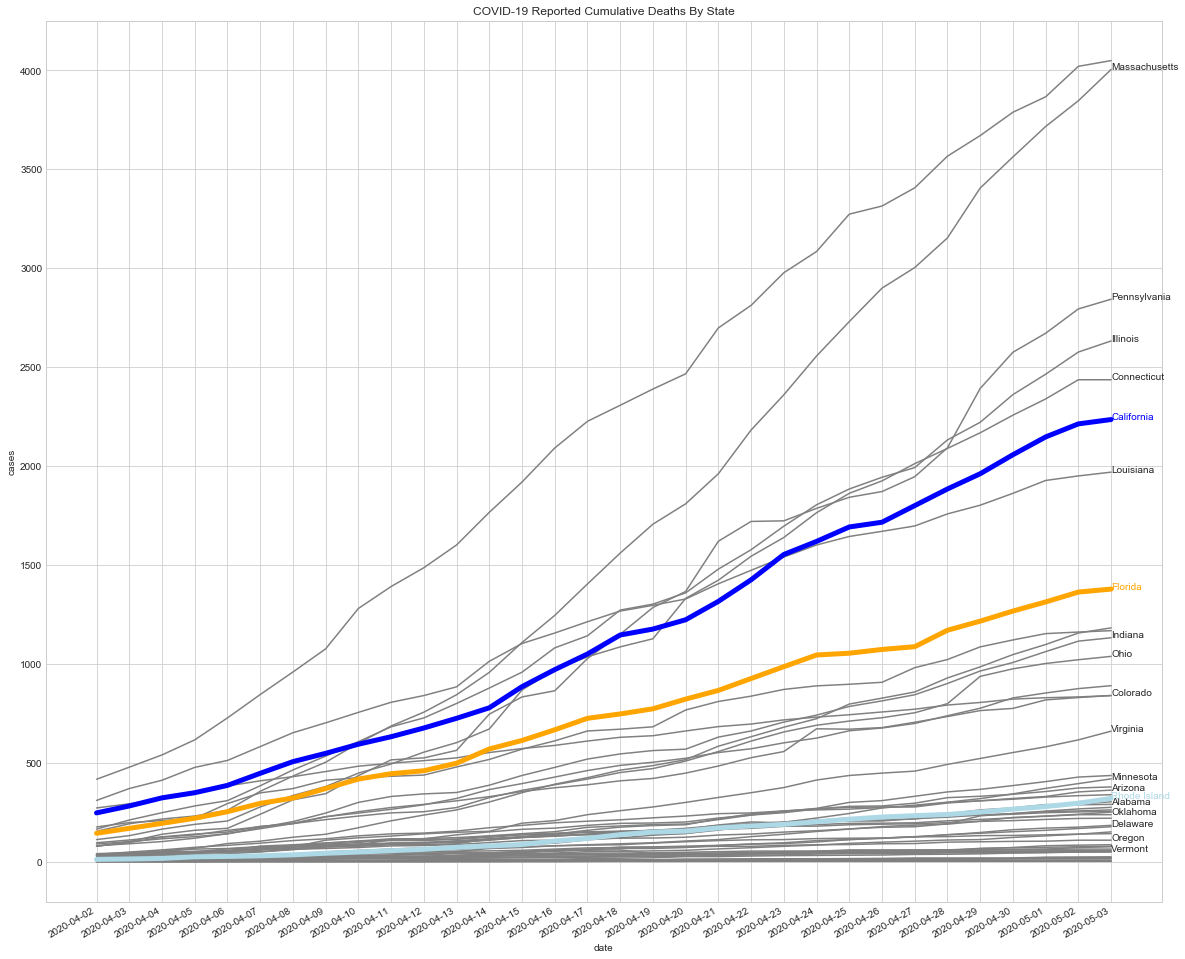

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('date')
ax.set_ylabel('cases')
ax.set_title('COVID-19 Reported Cumulative Deaths By State')

states = nytfiltered.state.unique()
lables = []

for state in states:
    if state!="New York" and state!="New Jersey":
        if state!="California" and state!="Florida" and state != 'Rhode Island':
            sdf = nytfiltered[(nytfiltered['state']==state)]
            plt.plot(sdf['date'], sdf['deaths'], color='grey', label=state)
            
            ldf = sdf.tail(1)
            date = ldf.iloc[0]['date']   
            cases = ldf.iloc[0]['deaths']
            lable_item = [state, date, cases]
            lables.append(lable_item)

#sort by cases
from operator import itemgetter
sortedlables = sorted(lables, key=itemgetter(2))
  
previous_cases = 0
for l in sortedlables:
    state = l[0]
    date = l[1]
    cases = l[2]
    #print(cases)
    
    if previous_cases == 0:
        previous_cases = cases
    
    if cases > previous_cases + 50:
        plt.text(date,cases,state,horizontalalignment='left')
        previous_cases = cases

state='California'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['deaths'], color='blue', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['deaths'],state,horizontalalignment='left',color='blue')

state='Florida'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['deaths'], color='orange', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['deaths'],state,horizontalalignment='left',color='orange')

state='Rhode Island'
sdf = nytfiltered[(nytfiltered['state']==state)]
plt.plot(sdf['date'], sdf['deaths'], color='lightblue', linewidth=5, label=state)

ldf = sdf.tail(1)
plt.text(ldf['date'],ldf['deaths'],state,horizontalalignment='left',color='lightblue')

fig.autofmt_xdate()

## Reported Daily Cases By State

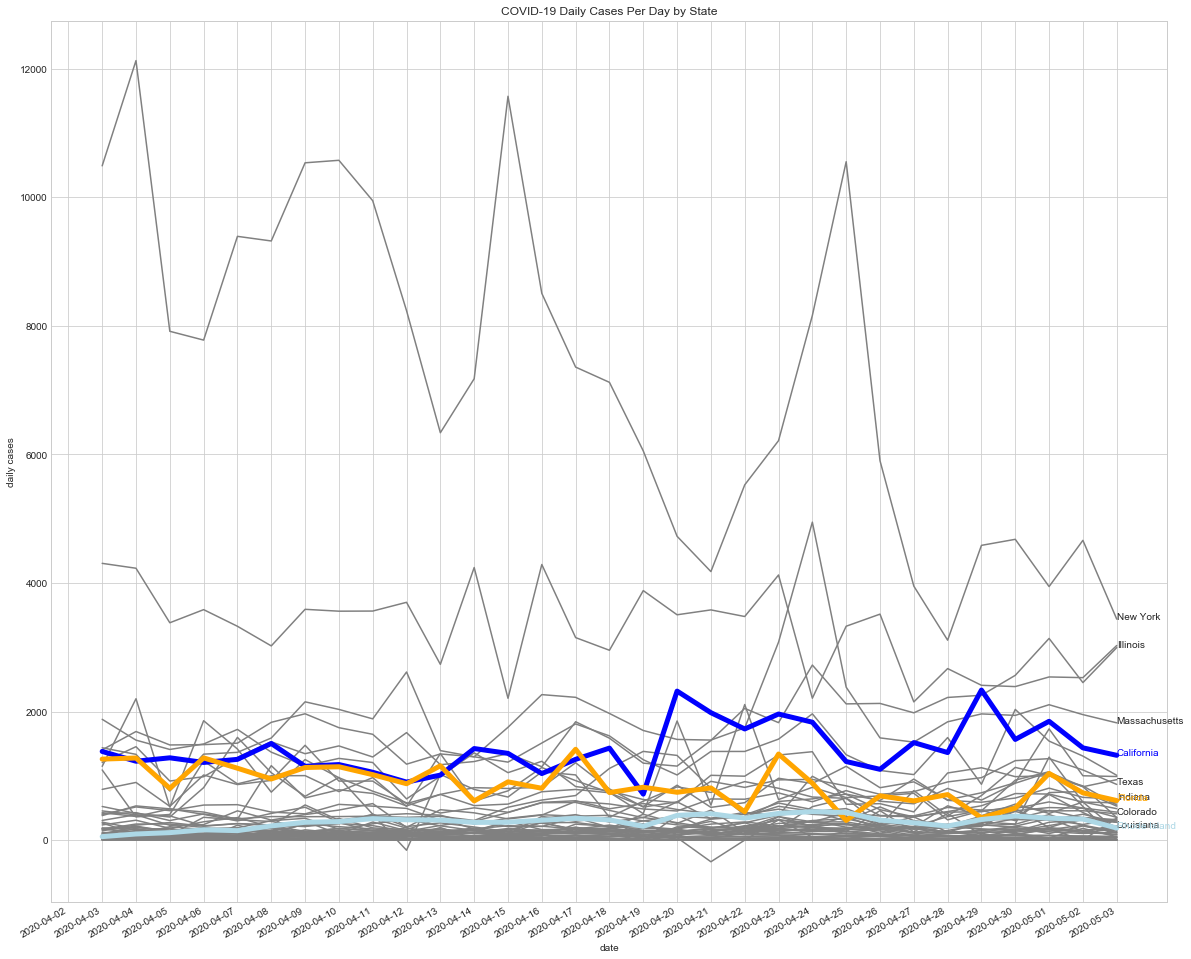

In [9]:
#PLOT LATEST CASES
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('date')
ax.set_ylabel('daily cases')
ax.set_title('COVID-19 Daily Cases Per Day by State')

states = nytfiltered.state.unique()
lables = []

for state in states:
    if state!="California" and state!="Florida" and state != 'Rhode Island':
        sdf = nytfiltered[(nytfiltered['state']==state)]
        dot = DOT(sdf['cases'])

        dr_df = sdf.copy()
        dr_df.insert(len(sdf.columns), 'case_change', dot, True)

        plt.plot(dr_df['date'], dr_df['case_change'], color='grey', label=state)

        ldf = dr_df.tail(1)
        date = ldf.iloc[0]['date']   
        cases = ldf.iloc[0]['case_change']
        lable_item = [state, date, cases]
        lables.append(lable_item)
    
#sort by cases
sortedlables = []
from operator import itemgetter
sortedlables = sorted(lables, key=itemgetter(2))
  
previous_cases = 0
for l in sortedlables:
    state = l[0]
    date = l[1]
    cases = l[2]
    
    if previous_cases == 0:
        previous_cases = cases
    
    if cases > previous_cases + 200:
        plt.text(date,cases,state,horizontalalignment='left')
        previous_cases = cases
        
state='California'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['cases'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'case_change', dot, True)
plt.plot(dr_df['date'], dr_df['case_change'], color='blue', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['case_change'],state,horizontalalignment='left',color='blue')

state='Florida'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['cases'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'case_change', dot, True)
plt.plot(dr_df['date'], dr_df['case_change'], color='orange', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['case_change'],state,horizontalalignment='left',color='orange')

state='Rhode Island'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['cases'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'case_change', dot, True)
plt.plot(dr_df['date'], dr_df['case_change'], color='lightblue', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['case_change'],state,horizontalalignment='left',color='lightblue')

fig.autofmt_xdate()

## Reported Daily Deaths By State

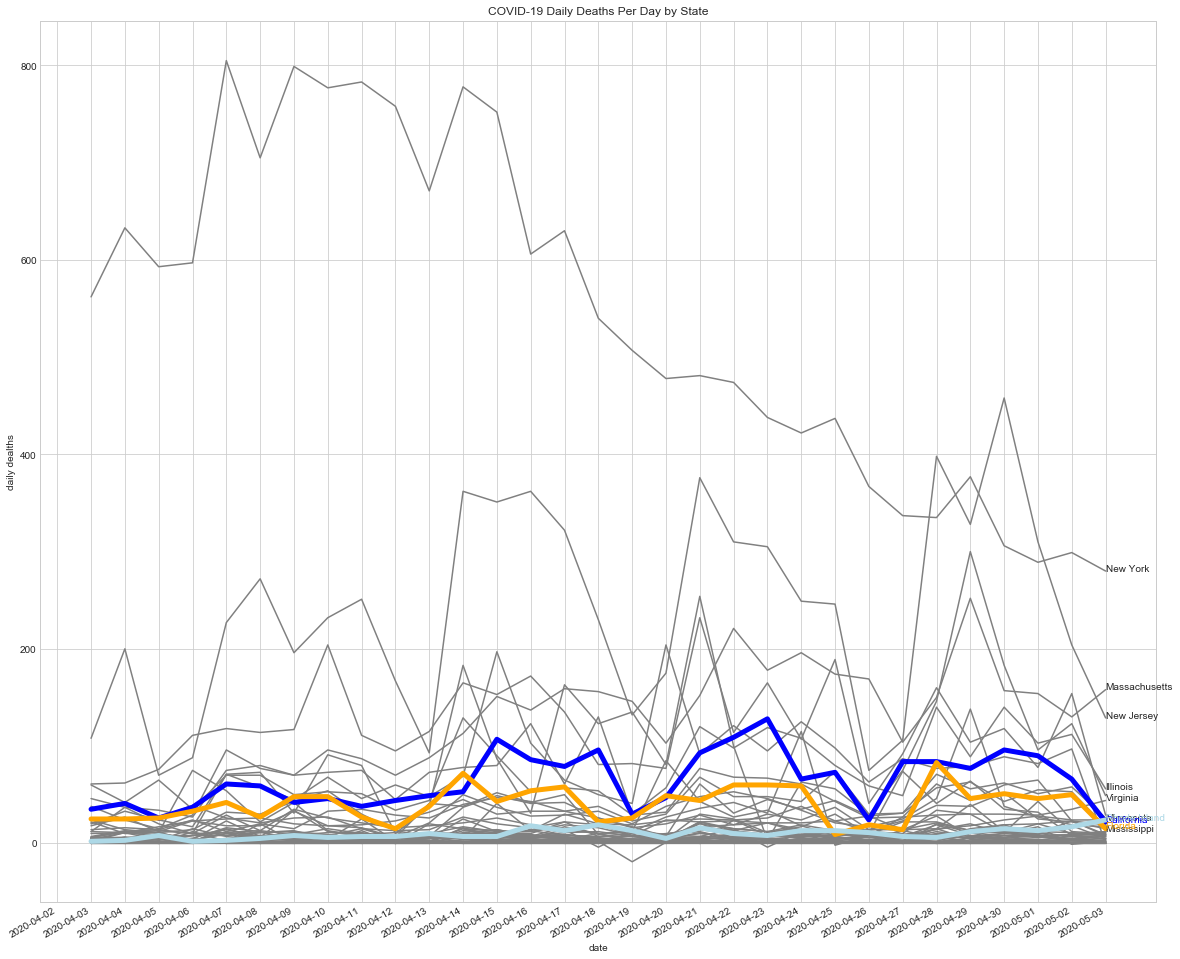

In [10]:
#PLOT LATEST DEATHS
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig.set_size_inches(20, 18)
ax = plt.axes()
ax.set_xlabel('date')
ax.set_ylabel('daily dealths')
ax.set_title('COVID-19 Daily Deaths Per Day by State')

states = nytfiltered.state.unique()
lables = []

for state in states:
    sdf = nytfiltered[(nytfiltered['state']==state)]
    dot = DOT(sdf['deaths'])
    
    dr_df = sdf.copy()
    dr_df.insert(len(sdf.columns), 'death_change', dot, True)
   
    plt.plot(dr_df['date'], dr_df['death_change'], color='grey', label=state)
    
    ldf = dr_df.tail(1)
    date = ldf.iloc[0]['date']   
    cases = ldf.iloc[0]['death_change']
    lable_item = [state, date, cases]
    lables.append(lable_item)
    
#sort by cases
sortedlables = []
from operator import itemgetter
sortedlables = sorted(lables, key=itemgetter(2))
  
previous_cases = 0
for l in sortedlables:
    state = l[0]
    date = l[1]
    cases = l[2]
    
    if previous_cases == 0:
        previous_cases = cases
    
    if cases > previous_cases + 10:
        plt.text(date,cases,state,horizontalalignment='left')
        previous_cases = cases
        
state='California'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['deaths'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'death_change', dot, True)
plt.plot(dr_df['date'], dr_df['death_change'], color='blue', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['death_change'],state,horizontalalignment='left',color='blue')

state='Florida'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['deaths'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'death_change', dot, True)
plt.plot(dr_df['date'], dr_df['death_change'], color='orange', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['death_change'],state,horizontalalignment='left',color='orange')

state='Rhode Island'
sdf = nytfiltered[(nytfiltered['state']==state)]
dot = DOT(sdf['deaths'])
dr_df = sdf.copy()
dr_df.insert(len(sdf.columns), 'death_change', dot, True)
plt.plot(dr_df['date'], dr_df['death_change'], color='lightblue', linewidth=5, label=state)

ldf = dr_df.tail(1)
plt.text(ldf['date'],ldf['death_change'],state,horizontalalignment='left',color='lightblue')

fig.autofmt_xdate()